# Syntax Candy: Select, Filter & Query examples

Data wrangling

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load CSV data usinmg pandas

In [3]:
tips = pd.read_csv(r'/Users/srmore/Downloads/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


# Select Columns


In [5]:
tips['total_bill'].head()

0    16.99
1    10.34
2    21.01
3    23.68
4    24.59
Name: total_bill, dtype: float64

In [10]:
tips[['total_bill','tip']].head()

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61


In [11]:
tips.loc[1:5, ['day', 'time', 'total_bill']]

,day,time,total_bill
1,Sun,Dinner,10.34
2,Sun,Dinner,21.01
3,Sun,Dinner,23.68
4,Sun,Dinner,24.59
5,Sun,Dinner,25.29


In [13]:
tips.iloc[1:5, 1:3]

,tip,sex
1,1.66,Male
2,3.50,Male
3,3.31,Male
4,3.61,Female


In [14]:
tips.select_dtypes(include='number').head()

,total_bill,tip,size
0,16.99,1.01,2
1,10.34,1.66,3
2,21.01,3.50,3
3,23.68,3.31,2
4,24.59,3.61,4


In [16]:
tips.select_dtypes(include=['object']).head()

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner


In [19]:
tips.filter(like='ti').head()

,tip,time
0,1.01,Dinner
1,1.66,Dinner
2,3.50,Dinner
3,3.31,Dinner
4,3.61,Dinner


# Filter Rows 
Use logical operators to filter rows
use `&` and `|`

In [20]:
# Numeric comparisions and logical AND
tips[ (tips['total_bill'] > 20) & (tips['tip'] >= 3)].head()

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4


In [22]:
# Membership OR - within a set
tips[ (tips['total_bill'] > 20) | (tips['tip'] >= 3)]

,total_bill,tip,sex,smoker,day,time,size
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
7,26.88,3.12,Male,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [26]:
tips[tips['day'].isin(['Sat','Sun'])].head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [29]:
tips[~tips['tip'].isna()].head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# DataFrame Query - Readable SQL

In [31]:
target_days = ['Sat']
tips.query("total_bill > 20 and day in @target_days").head()

,total_bill,tip,sex,smoker,day,time,size
19,20.65,3.35,Male,No,Sat,Dinner,3
21,20.29,2.75,Female,No,Sat,Dinner,2
23,39.42,7.58,Male,No,Sat,Dinner,4
28,21.70,4.30,Male,No,Sat,Dinner,2
33,20.69,2.45,Female,No,Sat,Dinner,4


# Method Chaning


In [32]:
(
    tips
    .assign(tip_pct=lambda d: d['tip'] / d['total_bill'] * 100)
    .groupby('day', dropna=False)['tip_pct'].mean()
    .reset_index()
    .sort_values('tip_pct', ascending=False)    
)

,day,tip_pct
0,Fri,16.991303
2,Sun,16.689729
3,Thur,16.127563
1,Sat,15.315172


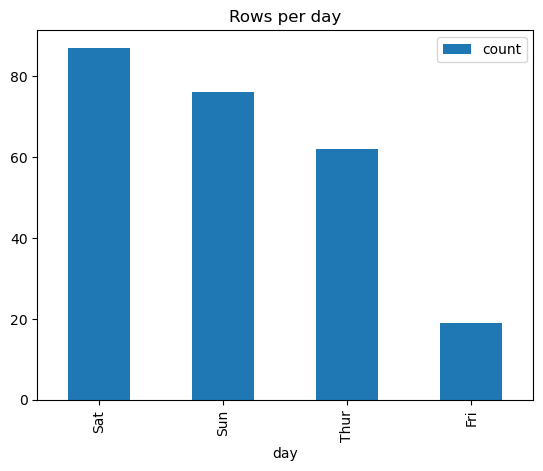

In [33]:
(
    tips['day']
    .value_counts()
    .reset_index(name='count')
    .rename(columns={'index':'day'})
    .plot(kind='bar', x='day', y='count', title='Rows per day')
); plt.show()